In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1977)

In [28]:
def MC(nsteps=100,delta=0.1,q0=None,qini=0.0,qfin=0.0,kappaini=1.0,kappafin=1.0):
    kappa=kappaini
    c=qini
    if not q0:
        q=np.sqrt(1/kappa)*(np.random.normal()+c)
    else:
        q=q0
    
    ene=0.5*kappa*(q-c)**2
    traj=[]
    
    work=0.0
    for istep in range(nsteps):
        qtry=q+(2*np.random.rand()-1)*delta
        enetry=0.5*kappa*(qtry-c)**2
        acceptance=np.exp(-(enetry-ene))
        if acceptance>np.random.rand():
            q=qtry
            ene=enetry
        # update k
        # update C
        work-=ene
        kappa=kappaini + (kappafin-kappaini)*istep/nsteps
        c=qini + (qfin-qini)*istep/nsteps
        ene=0.5*kappa*(q-c)**2
        work+=ene
        traj.append((q,work))
    return np.array(traj)

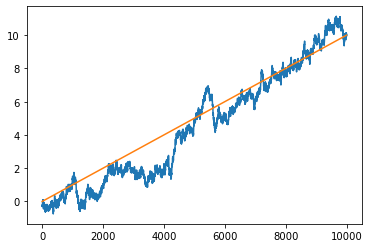

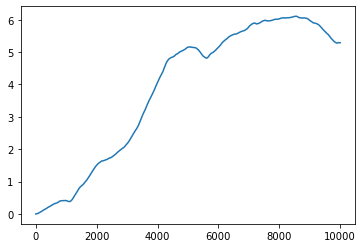

In [36]:
np.random.seed(1977)
traj=MC(nsteps=10000,qfin=10)
plt.plot(traj[:,0])
plt.plot(np.linspace(0,10,10000))
plt.show()
plt.plot(traj[:,1])

In [37]:
np.random.seed(1977)
traj=[]
for i in range(100):
    traj.append(MC(nsteps=10000,qfin=10))
traj=np.array(traj)
traj.shape

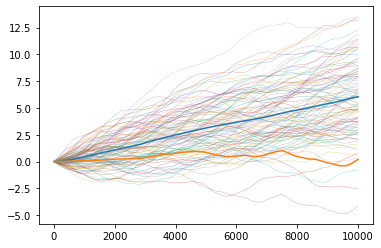

In [48]:
for i in range(100):
    plt.plot(traj[i,:,1],linewidth=0.2)
plt.plot(np.average(traj[:,:,1],axis=0))
plt.plot(-np.log(np.average(np.exp(-traj[:,:,1]),axis=0)))

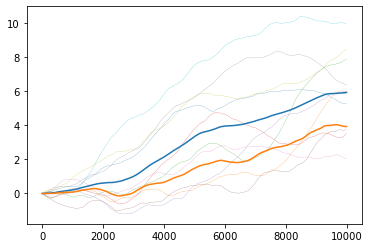

In [50]:
for i in range(0,100,10):
    plt.plot(traj[i,:,1],linewidth=0.2)
plt.plot(np.average(traj[::10,:,1],axis=0))
plt.plot(-np.log(np.average(np.exp(-traj[::10,:,1]),axis=0)))

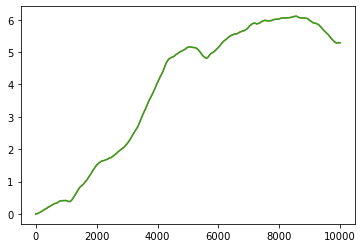

In [51]:
for i in range(0,100,100):
    plt.plot(traj[i,:,1],linewidth=0.2)
plt.plot(np.average(traj[::100,:,1],axis=0))
plt.plot(-np.log(np.average(np.exp(-traj[::100,:,1]),axis=0)))

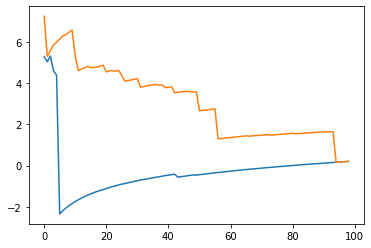

In [65]:
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[:i,-1,1]),axis=0)))
plt.plot(estimate)
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[-i:,-1,1]),axis=0)))
plt.plot(estimate)

In [67]:
np.random.seed(1977)
traj001=[]
for i in range(100):
    traj001.append(MC(nsteps=10000,qfin=10,delta=0.01))
traj001=np.array(traj001)
traj001.shape

(100, 10000, 2)

In [68]:
np.random.seed(1977)
traj1=[]
for i in range(100):
    traj1.append(MC(nsteps=10000,qfin=10,delta=1))
traj1=np.array(traj1)
traj1.shape

(100, 10000, 2)

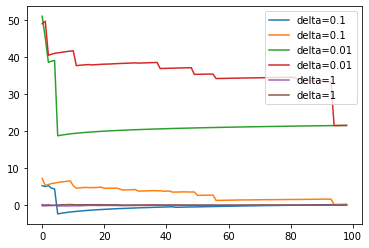

In [71]:
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[:i,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.1")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.1")

estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj001[:i,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.01")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj001[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.01")

estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1[:i,-1,1]),axis=0)))
plt.plot(estimate,label="delta=1")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="delta=1")

plt.legend()

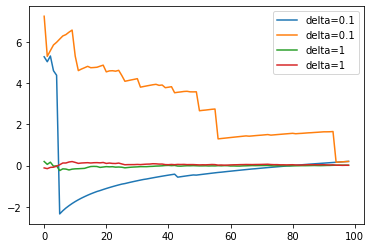

In [72]:
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[:i,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.1")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="delta=0.1")

estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1[:i,-1,1]),axis=0)))
plt.plot(estimate,label="delta=1")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="delta=1")

plt.legend()

In [73]:
np.random.seed(1977)
traj1000=[]
for i in range(100):
    traj1000.append(MC(nsteps=1000,qfin=10))
traj1000=np.array(traj1000)
traj1000.shape

(100, 1000, 2)

In [74]:
np.random.seed(1977)
traj100=[]
for i in range(100):
    traj100.append(MC(nsteps=100,qfin=10))
traj100=np.array(traj100)
traj100.shape

(100, 100, 2)

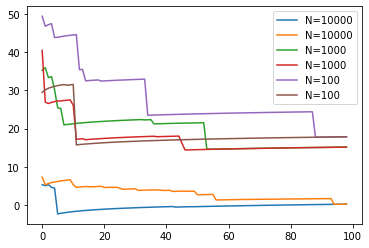

In [75]:
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[:i,-1,1]),axis=0)))
plt.plot(estimate,label="N=10000")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="N=10000")

estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1000[:i,-1,1]),axis=0)))
plt.plot(estimate,label="N=1000")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj1000[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="N=1000")

estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj100[:i,-1,1]),axis=0)))
plt.plot(estimate,label="N=100")
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj100[-i:,-1,1]),axis=0)))
plt.plot(estimate,label="N=100")

plt.legend()

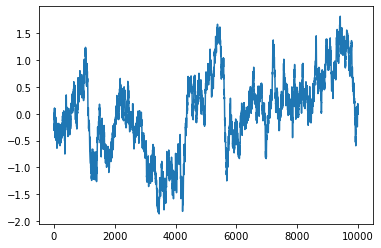

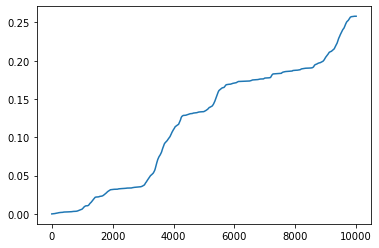

In [85]:
np.random.seed(1977)
traj=MC(nsteps=10000,kappaini=1.0,kappafin=2.0)
plt.plot(traj[:,0])
plt.show()
plt.plot(traj[:,1])

In [148]:
np.random.seed(1977)
traj=[]
for i in range(10000):
    traj.append(MC(nsteps=1000,kappaini=1.0,kappafin=2.0))
traj=np.array(traj)
traj.shape

(10000, 1000, 2)

In [149]:
np.random.seed(1977)
trajb=[]
for i in range(10000):
    trajb.append(MC(nsteps=1000,kappaini=2.0,kappafin=1.0))
trajb=np.array(trajb)
trajb.shape

(10000, 1000, 2)

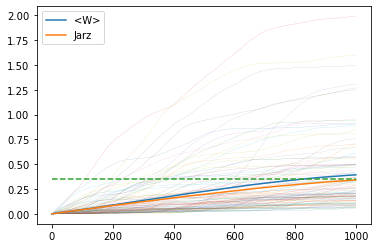

In [130]:
for i in range(100):
    plt.plot(traj[i,:,1],linewidth=0.1)
plt.plot(np.average(traj[:,:,1],axis=0),label="<W>")
plt.plot(-np.log(np.average(np.exp(-traj[:,:,1]),axis=0)),label="Jarz")
plt.plot(np.linspace(0,1000),np.log(np.sqrt(2.))*np.ones(50),"--")
plt.legend()

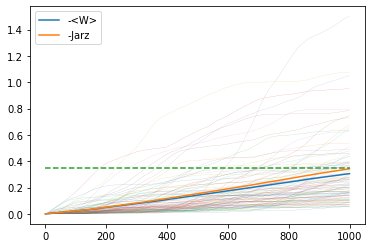

In [131]:
for i in range(100):
    plt.plot(-trajb[i,:,1],linewidth=0.1)
plt.plot(-np.average(trajb[:,:,1],axis=0),label="-<W>")
plt.plot(np.log(np.average(np.exp(-trajb[:,:,1]),axis=0)),label="-Jarz")
plt.plot(np.linspace(0,1000),np.log(np.sqrt(2.))*np.ones(50),"--")
plt.legend()

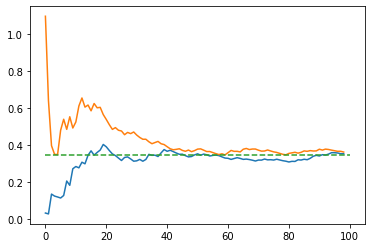

In [116]:
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[:i,-1,1]),axis=0)))
plt.plot(estimate)
estimate=[]
for i in range(1,100):
    estimate.append(-np.log(np.average(np.exp(-traj[-i:,-1,1]),axis=0)))
plt.plot(estimate)
plt.plot(np.linspace(0,100),np.log(np.sqrt(2.))*np.ones(50),"--")

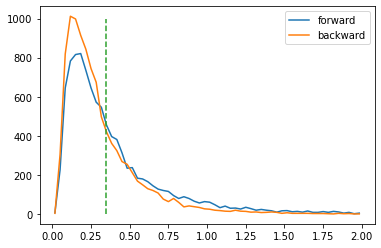

In [153]:
h=np.histogram(traj[:,-1,1],bins=60,range=(0,2))
hb=np.histogram(-trajb[:,-1,1],bins=60,range=(0,2))
plt.plot((h[1][:-1]+h[1][1:])/2,h[0],label="forward")
plt.plot((hb[1][:-1]+hb[1][1:])/2,hb[0],label="backward")
plt.plot(np.log(np.sqrt(2.))*np.ones(50),np.linspace(0,1000),"--")
plt.legend()

In [166]:
np.random.seed(1977)
traj=[]
for i in range(1000):
    traj.append(MC(nsteps=100,qini=0.0,qfin=4.0))
traj=np.array(traj)
traj.shape

(1000, 100, 2)

In [170]:
np.random.seed(1978)
trajb=[]
for i in range(1000):
    trajb.append(MC(nsteps=100,qini=4.0,qfin=0.0))
trajb=np.array(trajb)
trajb.shape

(1000, 100, 2)

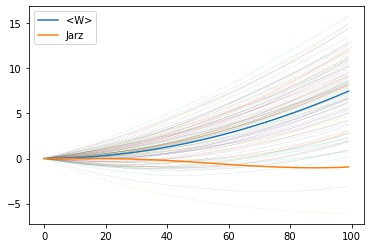

In [171]:
for i in range(100):
    plt.plot(traj[i,:,1],linewidth=0.1)
plt.plot(np.average(traj[:,:,1],axis=0),label="<W>")
plt.plot(-np.log(np.average(np.exp(-traj[:,:,1]),axis=0)),label="Jarz")
plt.legend()

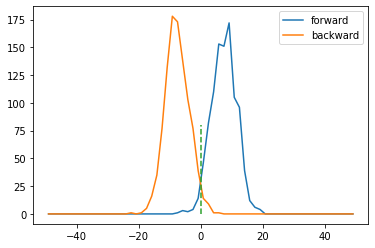

In [172]:
h=np.histogram(traj[:,-1,1],bins=60,range=(-50,50))
hb=np.histogram(-trajb[:,-1,1],bins=60,range=(-50,50))
plt.plot((h[1][:-1]+h[1][1:])/2,h[0],label="forward")
plt.plot((hb[1][:-1]+hb[1][1:])/2,hb[0],label="backward")
plt.plot(0.*np.ones(50),np.linspace(0,80),"--")
plt.legend()